In [1]:
import os

In [2]:
os.chdir('..')

<img src="flow_2.png">

In [3]:
from flows.flows import Flows

Welcome to the Data Science Package. First create an object as follows:
For example, use the code below to import the flow 0:
flow = Flows(0)
You can define the `categorical_threshold` which is the maximum number of categories that a categorical feature should have before considering it as continuous numeric feature. The default value is 50
For example, use the code below to import the flow 0 with defining the categorical_threshold as 50
flow = Flows(flow_id=0, categorical_threshold=50)


In [4]:
flow = Flows(2)

Please use the following function to read the data
dataframe_dict = flow.load_data(path: str, files_list: list)
For example: path = './data'
For example: files_list = ['train.csv','test.csv']
The output is a dictionary that contains dataframes e.g.  
dataframe_dict = {'train': train_dataframe,'test': test_dataframe}


In [5]:
path = "./data/flow_2"
files_list = ["train.csv","test.csv"]

In [6]:
dataframe_dict, columns_set = flow.load_data(path, files_list)

A summary of the data sets


,train,test
column type,,
categorical_integer,0,0
categorical_string,9,8
continuous,5,4
date,1,1
json,8,9
other,0,0
total amount,23,22


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
The possible ids are {'id', 'imdb_id', 'popularity'}
The possible possible_target are ['revenue']
The type of the problem that should be solved {'revenue': 'regression'}
You have JSON nested data inside the dataframe columns. Flatten the nested JSON data by applying the following function:
dataframe_dict, columns_set= flow.flatten_json_data(dataframe_dict)


In [7]:
dataframe_dict, columns_set= flow.flatten_json_data(dataframe_dict)

Flatting column: belongs_to_collection
Flatting column: genres
Flatting column: production_companies
Flatting column: production_countries
Flatting column: spoken_languages
Flatting column: Keywords
Flatting column: cast
Flatting column: crew
A summary of the data sets


,train,test
column type,,
categorical_integer,39,38
categorical_string,163,166
continuous,55,55
date,6,2
json,0,1
other,0,0
total amount,263,262


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
If you have categorical features with string labels, Encode the categorical features by applying the following function:
dataframe_dict, columns_set = flow.encode_categorical_feature(dataframe_dict: dict)


In [8]:
dataframe_dict, columns_set = flow.encode_categorical_feature(dataframe_dict)

The reference dataframe is: train
******************************
A summary of the data sets


,train,test
column type,,
categorical_integer,89,83
categorical_string,0,5
continuous,168,173
date,6,1
json,0,0
other,0,0
total amount,263,262


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
If you have numeric features, it is a good idea to normalize numeric features. Use the following function for feature normalization :
dataframe_dict, columns_set = flow.scale_data (dataframe_dict: dict, ignore_columns: list)
For example: ignore_columns = ['id', 'target']


In [9]:
ignore_columns = ['id', 'revenue']

In [10]:
dataframe_dict, columns_set = flow.scale_data(dataframe_dict, ignore_columns)

A summary of the data sets


,train,test
column type,,
categorical_integer,89,83
categorical_string,0,5
continuous,168,173
date,6,1
json,0,0
other,0,0
total amount,263,262


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
Your features are ready to train the model: 
If you want to explore the data you can run one of the following functions: 
1 . flow.exploring_data(dataframe_dict: dict, key_i: str)
For example: flow.exploring_data(dataframe_dict, 'train')
2 . flow.comparing_statistics(dataframe_dict: dict)
For example: flow.comparing_statistics(dataframe_dict)




You can start training the model by applying the following function: 
model_index_list, save_models_dir, y_test = flow.training(parameters)
parameters = { 
 "data": {
 "train": {"features": train_dataframe, "target": train_target},
 "valid": {"features": valid_dataframe, "target": valid_target},
 "test": {"features": test_dataframe, "target": test_target},
 },
 "split": {
 "method": "split",  # "

Exploring column: id
If there are missing values, they will be replaced by the term: -9999
The 5 most repeated values:
the value 4094     is found  1 times
the value 4835     is found  1 times
the value 4823     is found  1 times
the value 6874     is found  1 times
the value 4827     is found  1 times
The 5 least repeated values
the value 3351     is found  1 times
the value 5396     is found  1 times
the value 3347     is found  1 times
the value 5392     is found  1 times
the value 4098     is found  1 times
The number of unique values is --> 4398
If you applied a normalization function, the x axis will show the normalized values.


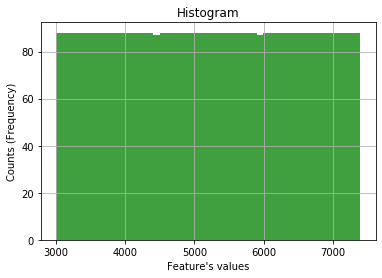

In [11]:
flow.exploring_data(dataframe_dict, "test")

id: Comparing the statistical properties


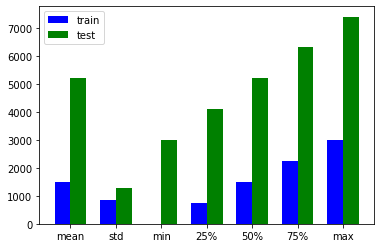

In [12]:
flow.comparing_statistics(dataframe_dict)

In [13]:
ignore_columns = ["id", "release_date", "revenue"]
columns = dataframe_dict["train"].columns
train_dataframe = dataframe_dict["train"][[x for x in columns_set["train"]["continuous"] if x not in ignore_columns]]
test_dataframe = dataframe_dict["test"][[x for x in columns_set["train"]["continuous"] if x not in ignore_columns]]
train_target = dataframe_dict["train"]["revenue"]

In [14]:
parameters = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # foldnr:5 , "split_ratios": 0.8 # "split_ratios":(0.7,0.2)
    },
    "model": {"type": "Ridge linear regression",
              "hyperparameters": {"alpha": "optimize",  # alpha:optimize
                                  },
              },
    "metrics": ["r2_score", "mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [15]:
model_index_list, save_models_dir, y_test = flow.training(parameters)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
{'r2_score (train.train)': 67.61, 'mean_squared_error (train.train)': 6546600044115886.0, 'r2_score (train.validation)': 62.37, 'mean_squared_error (train.validation)': 5084606750712582.0}
fold_nr. 2
{'r2_score (train.train)': 68.2, 'mean_squared_error (train.train)': 5445447195619802.0, 'r2_score (train.validation)': 59.34, 'mean_squared_error (train.validation)': 1.0559274556050284e+16}
fold_nr. 3
{'r2_score (train.train)': 65.22, 'mean_squared_error (train.train)': 6629820394829373.0, 'r2_score (train.validation)': 73.8, 'mean_squared_error (train.validation)': 4793264072532893.0}
fold_nr. 4
{'r2_score (train.train)': 69.89, 'mean_squared_error (train.train)': 6108809815850518.0, 'r2_score (train.validation)': 49.3, 'mean_squared_error (train.validation)': 6790113966867325.0}
fold_nr. 5
{'r2_score (train.train)': 66.73, 'mean_squared_error (train.train)': 5937221370042006.0, 'r2_score (train.v

,fold_1,fold_2,fold_3,fold_4,fold_5,mean
mean_squared_error (train.train),6.546600e+15,5.445447e+15,6.629820e+15,6.108810e+15,5.937221e+15,6.133580e+15
mean_squared_error (train.validation),5.084607e+15,1.055927e+16,4.793264e+15,6.790114e+15,7.840840e+15,7.013620e+15
r2_score (train.train),6.761000e+01,6.820000e+01,6.522000e+01,6.989000e+01,6.673000e+01,6.753000e+01
r2_score (train.validation),6.237000e+01,5.934000e+01,7.380000e+01,4.930000e+01,6.614000e+01,6.219000e+01


,model 1,model 2,model 3,model 4,model 5,mean
mean_squared_error (train),6.254201e+15,6.468213e+15,6.262509e+15,6.245071e+15,6.317945e+15,6.309588e+15
r2_score (train),6.692000e+01,6.579000e+01,6.688000e+01,6.697000e+01,6.659000e+01,6.663000e+01


This is the end of the flow


In [16]:
parameters_lighgbm = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # foldnr:5 , "split_ratios": 0.8 # "split_ratios":(0.7,0.2)
    },
    "model": {"type": "lightgbm",
              "hyperparameters": dict(objective='regression', metric='root_mean_squared_error', num_leaves=5,
                                      boost_from_average=True,
                                      learning_rate=0.05, bagging_fraction=0.99, feature_fraction=0.99, max_depth=-1,
                                      num_rounds=10000, min_data_in_leaf=10, boosting='dart')
              },
    "metrics": ["r2_score", "mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [17]:
model_index_list, save_models_dir, y_test = flow.training(parameters_lighgbm)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
{'r2_score (train.train)': 99.2, 'mean_squared_error (train.train)': 162532072875726.03, 'r2_score (train.validation)': 69.2, 'mean_squared_error (train.validation)': 4161872311224590.5}
fold_nr. 2
{'r2_score (train.train)': 99.19, 'mean_squared_error (train.train)': 138068043611638.67, 'r2_score (train.validation)': 65.72, 'mean_squared_error (train.validation)': 8901642375697507.0}
fold_nr. 3
{'r2_score (train.train)': 99.2, 'mean_squared_error (train.train)': 152172631423137.28, 'r2_score (train.validation)': 81.64, 'mean_squared_error (train.validation)': 3358898044730845.5}
fold_nr. 4
{'r2_score (train.train)': 99.27, 'mean_squared_error (train.train)': 147493714262241.38, 'r2_score (train.validation)': 54.66, 'mean_squared_error (train.validation)': 6071373086620322.0}
fold_nr. 5
{'r2_score (train.train)': 99.2, 'mean_squared_error (train.train)': 142303366061344.75, 'r2_score (train.valida

,fold_1,fold_2,fold_3,fold_4,fold_5,mean
mean_squared_error (train.train),1.625321e+14,1.380680e+14,1.521726e+14,1.474937e+14,1.423034e+14,1.485140e+14
mean_squared_error (train.validation),4.161872e+15,8.901642e+15,3.358898e+15,6.071373e+15,7.376339e+15,5.974025e+15
r2_score (train.train),9.920000e+01,9.919000e+01,9.920000e+01,9.927000e+01,9.920000e+01,9.921200e+01
r2_score (train.validation),6.920000e+01,6.572000e+01,8.164000e+01,5.466000e+01,6.814000e+01,6.787200e+01


,model 1,model 2,model 3,model 4,model 5,mean
mean_squared_error (train),9.624001e+14,1.890783e+15,7.935177e+14,1.332270e+15,1.589111e+15,1.313616e+15
r2_score (train),9.491000e+01,9.000000e+01,9.580000e+01,9.295000e+01,9.160000e+01,9.305200e+01


This is the end of the flow


In [18]:
parameters_xgboost = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # fold_nr:5 , "split_ratios": 0.3 # "split_ratios":(0.3,0.2)
    },
    "model": {"type": "xgboost",
              "hyperparameters": {'max_depth': 5, 'eta': 1, 'eval_metric': "rmse"}
              },
    "metrics": ["r2_score", "mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [19]:
model_index_list, save_models_dir, y_test = flow.training(parameters_xgboost)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
The objective is not defined. The default value is reg:squarederror. Error: 'objective'
fold_nr. 1
The num_round is not defined. The default value is num_round = 10. Error: 'num_round'
[0]	train-rmse:6.379e+07	test-rmse:8.1404e+07
[1]	train-rmse:5.30354e+07	test-rmse:7.98035e+07
[2]	train-rmse:4.76315e+07	test-rmse:8.40547e+07
[3]	train-rmse:4.49167e+07	test-rmse:8.48168e+07
[4]	train-rmse:4.1329e+07	test-rmse:8.74375e+07
[5]	train-rmse:3.9357e+07	test-rmse:8.93973e+07
[6]	train-rmse:3.65121e+07	test-rmse:9.0741e+07
[7]	train-rmse:3.51372e+07	test-rmse:9.15847e+07
[8]	train-rmse:3.27178e+07	test-rmse:9.10178e+07
[9]	train-rmse:3.02967e+07	test-rmse:9.17028e+07
{'r2_score (train.train)': 95.46, 'mean_squared_error (train.train)': 917891806851493.8, 'r2_score (train.validation)': 37.77, 'mean_squared_error (train.validation)': 8409395281268395.0}
fold_nr. 2
The num_round is not defined. The default value is n

,fold_1,fold_2,fold_3,fold_4,fold_5,mean
mean_squared_error (train.train),9.178918e+14,8.590990e+14,7.665587e+14,7.713698e+14,9.455135e+14,8.520865e+14
mean_squared_error (train.validation),8.409395e+15,1.461103e+16,9.161250e+15,1.172512e+16,1.219465e+16,1.122029e+16
r2_score (train.train),9.546000e+01,9.498000e+01,9.598000e+01,9.620000e+01,9.470000e+01,9.546400e+01
r2_score (train.validation),3.777000e+01,4.373000e+01,4.993000e+01,1.245000e+01,4.734000e+01,3.824400e+01


,model 1,model 2,model 3,model 4,model 5,mean
mean_squared_error (train),2.416192e+15,3.609484e+15,2.445497e+15,2.962119e+15,3.195341e+15,2.925727e+15
r2_score (train),8.722000e+01,8.091000e+01,8.707000e+01,8.433000e+01,8.310000e+01,8.452600e+01


This is the end of the flow
